In [1]:
import numpy as np
import keras 
import cv2
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
from keras.models import load_model

In [3]:
model = load_model('anuvgg19.h5')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 7, 7, 512)         20024384  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 33)                16929     
Total params: 46,257,249
Trainable params: 28,592,673
Non-trainable params: 17,664,576
_________________________________

In [5]:
from keras import models
from keras import layers
from keras import optimizers


In [6]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [7]:
img3 = cv2.imread('/home/asus/Desktop/Dataset_splits/test/Pepper__bell___Bacterial_spot/anu223.jpg')
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
img3 = cv2.resize(img3,(224,224))
img4 = np.reshape(img3,[1,224,224,3])


In [8]:
disease = model.predict_classes(img4)
prediction = disease[0]
print(prediction)

13


In [9]:
reverse_mapping = ['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'GD_Alternia', 'GD_Deficiency', 'GD_Healthy', 'GD_Leaf_Blight', 'GD_Rust', 'GD_Spidermites', 'GD_Toxicity', 'GD_Webbloch', 'Paddy_Bacterial_leaf_blight', 'Paddy_Brown_spot', 'Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy', 'pomo_Alternaria_Alternata', 'pomo_Anthracnose', 'pomo_Bacterial_Blight', 'pomo_Cercospora_LeafSpot', 'pomo_Healthy_Leaves']

In [10]:
prediction_name = reverse_mapping[prediction]
# prediction_name

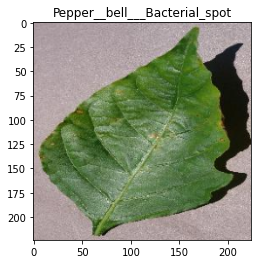

In [11]:
plt.imshow(img3)
plt.title(prediction_name)
plt.show()